In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import os

In [2]:
adata = sc.read_h5ad("./dataset/validation_large_sc_cardiac.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 191795 × 28975
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'donor_id', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'X_approximate_distribution', 'batch_condition', 'cell_type_original_colors', 'citation', 'default_embedding', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_harmony', 'X_pca',

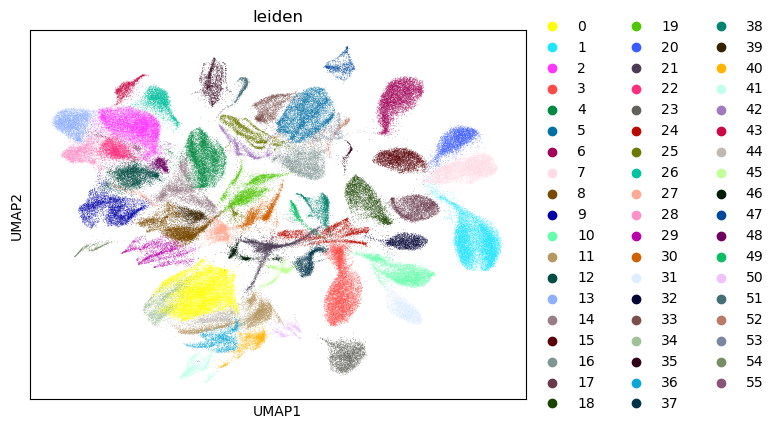

In [5]:
sc.pp.neighbors(adata) #Calculate neighbors
sc.tl.umap(adata) #Run UMAP algorithm

#Run the leiden clustering algorithm to create the 'leiden' annotation
sc.tl.leiden(adata, resolution=1.0)

#plot the UMAP
sc.pl.umap(adata, color='leiden')

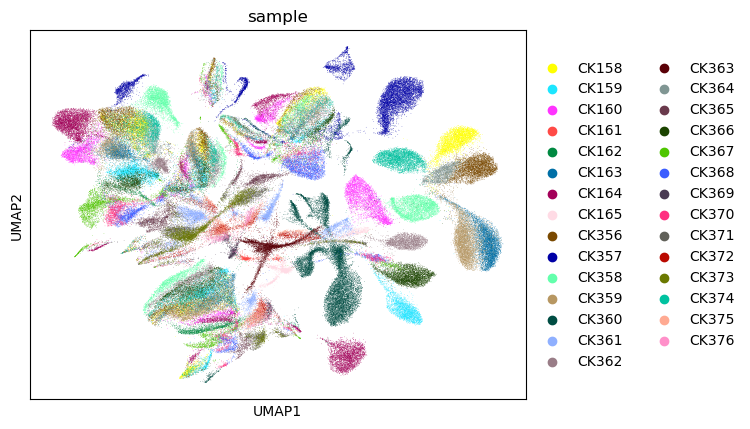

In [6]:
sc.pl.umap(adata, color='sample')

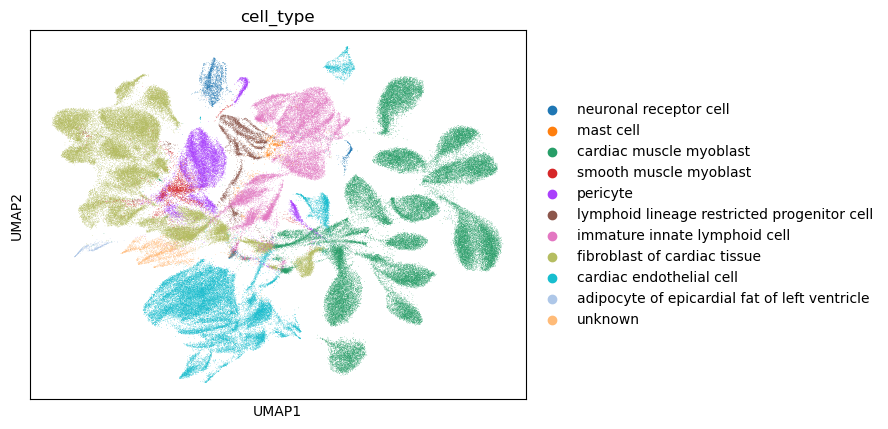

In [7]:
sc.pl.umap(adata, color='cell_type')

In [8]:
if adata.raw is not None:
    adata = adata.raw.to_adata()
else:
    print("The .raw attribute is not set. You need to set it first using adata.raw = data or another appropriate method.")

In [31]:
io.mmwrite('./processed/matrix', adata.X.T)

In [25]:
adata.obs_names

Index(['AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCAGTGCTTATG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCATCACGAGGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACCCATCCCGAATA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACGAAAGCTCACTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       'AAACGAAAGGTCGCCT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1',
       ...
       'TTTATGCCATGTTCGA-1', 'TTTATGCGTATCCTTT-1', 'TTTATGCTCCGATGCG-1',
       'TTTCAGTCATTGCTGA-1', 'TTTCAGTTCCCATTCG-1', 'TTTCATGGTCTTGCTC-1',
       'TTTCCTCAGGTTCATC-1', 'TTTCGATTCCGGTAAT-1', 'TTTGACTTCGCCAACG-1',
       'TTTGGTTGTGCCCAGT-1'],
      dtype='object', length=191795)

In [26]:
with open ('./processed/barcodes.tsv', 'w') as f:
    for item in adata.obs_names:
        f.write(item + '\n')

In [27]:
adata.var_names

Index(['ENSG00000177613', 'ENSG00000128918', 'ENSG00000143977',
       'ENSG00000196177', 'ENSG00000244482', 'ENSG00000234426',
       'ENSG00000158578', 'ENSG00000133393', 'ENSG00000149091',
       'ENSG00000272444',
       ...
       'ENSG00000263711', 'ENSG00000245864', 'ENSG00000108946',
       'ENSG00000078246', 'ENSG00000229694', 'ENSG00000179152',
       'ENSG00000248174', 'ENSG00000249875', 'ENSG00000215251',
       'ENSG00000171858'],
      dtype='object', length=28975)

In [28]:
with open ('./processed/features.tsv', 'w') as f:
    for item in adata.var_names:
        f.write(item + '\n')

In [29]:
adata.obs

,sample,n_counts,n_genes,percent_mito,doublet_score,dissociation_score,cell_type_original,patient_region_id,donor_id,patient_group,...,tissue_type,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid,leiden
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,2598.0,1678,0.115473,0.000324,0.137064,Fibroblast,control_P1,P1,myogenic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,normal,male,heart left ventricle,European,44-year-old stage,ncLQ^>4V~0,2
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,13003.0,4187,0.053834,0.003417,-0.006482,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,male,heart left ventricle,European,44-year-old stage,OIH`^@&ZXS,20
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,6365.0,2700,0.047133,0.032239,0.005020,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,male,heart left ventricle,European,44-year-old stage,e8Qt8qYxVF,20
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,627.0,519,0.000000,0.000365,0.087506,Fibroblast,control_P1,P1,myogenic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,normal,male,heart left ventricle,European,44-year-old stage,0SKw_<k7u@,2
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,4488.0,1999,0.155971,0.004785,-0.001798,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,male,heart left ventricle,European,44-year-old stage,B)sH)`nDwH,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCATGGTCTTGCTC-1,CK376,1153.0,940,0.000000,0.521381,0.066911,Fibroblast,IZ_P16,P16,ischemic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,myocardial infarction,male,heart left ventricle,European,66-year-old stage,sQ@-q!5@uO,27
TTTCCTCAGGTTCATC-1,CK376,657.0,570,0.456621,0.006264,0.019443,Lymphoid,IZ_P16,P16,ischemic,...,tissue,lymphoid lineage restricted progenitor cell,10x 3' v3,myocardial infarction,male,heart left ventricle,European,66-year-old stage,^KI8(5r80@,46
TTTCGATTCCGGTAAT-1,CK376,808.0,673,0.000000,0.001830,0.104566,Myeloid,IZ_P16,P16,ischemic,...,tissue,immature innate lymphoid cell,10x 3' v3,myocardial infarction,male,heart left ventricle,European,66-year-old stage,upGc?V#Y@~,30
TTTGACTTCGCCAACG-1,CK376,862.0,717,0.232019,0.013721,0.024106,Endothelial,IZ_P16,P16,ischemic,...,tissue,cardiac endothelial cell,10x 3' v3,myocardial infarction,male,heart left ventricle,European,66-year-old stage,URA;I!G2Ye,11


In [30]:
adata.obs.to_csv('./processed/metadata.csv')